## Universidad Nacional de Colombia
### Matemáticas para el Aprendizaje de Máquinas 2022-I
#### Exercise List 1 - Codes

In [1]:
using Distributions
using StatsBase
using Plots

First, we need to create a function that flip all coins once and return head or tail for each coin.

In [2]:
function flip_coins(num_coins)
    probs = rand(num_coins)
    heads_tails= [probs[i] > 0.5 for i = 1:size(probs)[1]]
    return heads_tails
end

flip_coins (generic function with 1 method)

Now we have to define a function that calculate the $v$ values of the problem.

In [3]:
function find_vs(num_coins, num_flips)
    c_rand = StatsBase.sample(1:num_coins)
    heads_sum = zeros(num_coins)
    
    for flip in range(1, num_flips)
        heads_sum += flip_coins(num_coins)
    end
    
    freq_heads = heads_sum/num_flips
    
    v_1 = freq_heads[1]
    v_rand = freq_heads[c_rand]
    c_min = Int(minimum(findall(x->x==Int(minimum(heads_sum)), heads_sum)))
    v_min = freq_heads[c_min]
    
    return [v_1, v_rand, v_min]
end

find_vs (generic function with 1 method)

## Problem 3b

In [4]:
function ex3b(num_coins, num_flips, num_exp)
    vs_vals = []
    for exp in range(1, num_exp)
        push!(vs_vals, find_vs(num_coins, num_flips))
    end
    vs_vals = reduce(vcat,transpose.(vs_vals)) 
    return vs_vals
end

ex3b (generic function with 1 method)

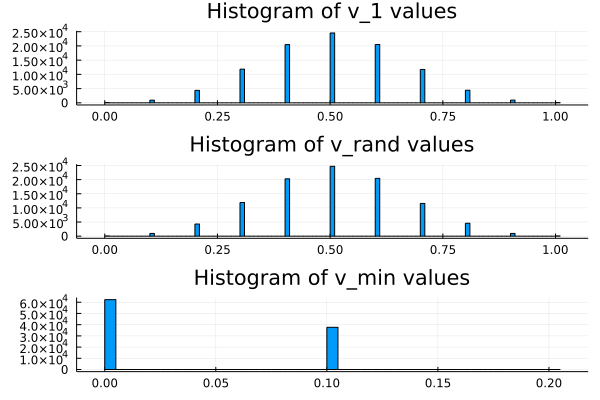

In [5]:
num_coins = 1000
num_flips = 10
num_exp = 100000

values_v = ex3b(num_coins, num_flips, num_exp)
v_1_vals = values_v[:,1]
v_rand_vals = values_v[:,2]
v_min_vals = values_v[:,3];

p1 = histogram(v_1_vals, title = "Histogram of v_1 values")
p2 = histogram(v_rand_vals, title = "Histogram of v_rand values")
p3 = histogram(v_min_vals, title = "Histogram of v_min values")

plot(p1,p2,p3, layout = (3, 1), legend = false)

## Problem 3c

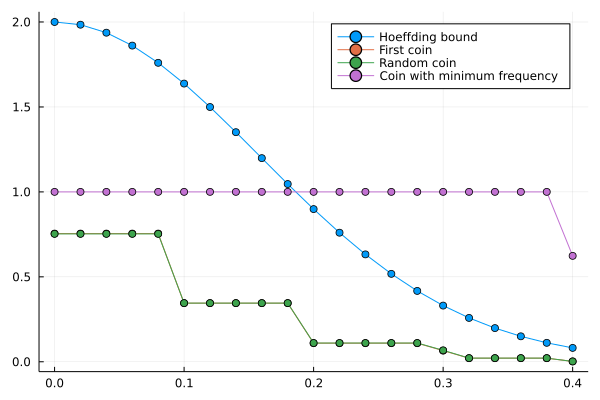

In [6]:
function hoeffding_bound(epn, N)
    return 2.0*exp(-2.0*(epn^2)*N)
end

epns = range(0.0,0.4,step = 0.02)
hoeff_bounds = hoeffding_bound.(epns, num_flips)

v_mean = 0.5
dif_νs_μ = abs.(values_v.- v_mean)

p_v1, p_vrand, p_vmin = zeros(size(epns)[1]), zeros(size(epns)[1]), zeros(size(epns)[1])

for i in 1:size(epns)[1]
    ep = epns[i]
    p_v1[i] = sum(dif_νs_μ[:,1] .> ep)/num_exp
    p_vrand[i] = sum(dif_νs_μ[:,2] .> ep)/num_exp
    p_vmin[i] = sum(dif_νs_μ[:,3] .> ep)/num_exp
end

plot(epns, hoeff_bounds, label = "Hoeffding bound", markershape=:circle)
plot!(epns, p_v1, label = "First coin", markershape=:circle)
plot!(epns, p_vrand, label = "Random coin", markershape=:circle)
plot!(epns, p_vmin, label = "Coin with minimum frequency", markershape=:circle)